<a href="https://colab.research.google.com/github/sindoll2/github-project/blob/main/membrane_linReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
myfile = files.upload()

Saving membranedata.csv to membranedata (1).csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib
warnings.filterwarnings("ignore")

In [ ]:
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False




membrane_df=pd.read_csv('membranedata.csv', encoding='cp949', header = None,
                             names=['Author', 'Year', 'Membrane AL Type', 'Manufacture',
       'Membrane Direction', 'Flow Orientation(counter / cocurrent)',
       'Feed Solution (FS)', 'fs molarity (m)', 'FS Osmotic pressure(atm)',
       'Draw Solution (DS)', 'DS Molarity (M)', 'DS Osmotic pressure(atm)',
       'P Difference(atm)', 'FS Velocity (cm/s)', 'DS Velocity (cm/s)',
       'FS Temperature(C)', 'DS Temperature (C)', 'Membrane Flux (LMH)',
       'Reverse Salt Flux(mol/m2 hr)', 'An(LMH/atm)', 'B(LMH)'])


membrane_df = membrane_df[['Year', 'Membrane AL Type', 'Manufacture',
       'Membrane Direction', 'Flow Orientation(counter / cocurrent)',
       'Feed Solution (FS)', 'fs molarity (m)', 'FS Osmotic pressure(atm)',
       'Draw Solution (DS)', 'DS Molarity (M)', 'DS Osmotic pressure(atm)',
       'P Difference(atm)', 'FS Velocity (cm/s)', 'DS Velocity (cm/s)',
       'FS Temperature(C)', 'DS Temperature (C)', 'Membrane Flux (LMH)',
       'Reverse Salt Flux(mol/m2 hr)', 'An(LMH/atm)']]
membrane_df = membrane_df.dropna()
array = list(membrane_df)
membrane_df


,Year,Membrane AL Type,Manufacture,Membrane Direction,Flow Orientation(counter / cocurrent),Feed Solution (FS),fs molarity (m),FS Osmotic pressure(atm),Draw Solution (DS),DS Molarity (M),DS Osmotic pressure(atm),P Difference(atm),FS Velocity (cm/s),DS Velocity (cm/s),FS Temperature(C),DS Temperature (C),Membrane Flux (LMH),Reverse Salt Flux(mol/m2 hr),An(LMH/atm)
0,Year,Membrane AL Type,Manufacture,Membrane Direction,Flow Orientation\n(counter / cocurrent),Feed Solution (FS),FS Molarity (M),FS Osmotic pressure\n(atm),Draw Solution (DS),DS Molarity (M),DS Osmotic pressure\n(atm),P Difference\n(atm),FS Velocity (cm/s),DS Velocity (cm/s),FS Temperature\n(째C),DS Temperature (째C),Membrane Flux \n(LMH),Reverse Salt Flux\n(mol/m2 hr),A\n(LMH/atm)
1,2015,TFC,Oasys,AL-FS,counter,DI,0,0,NaCl,1.5,67.11,67.11,25,25,20,20,23.84,0.11,0.36
2,2015,TFC,Oasys,AL-FS,counter,DI,0,0,NaCl,1,44.74,44.74,25,25,20,20,20,0.06,0.45
3,2015,TFC,Oasys,AL-FS,counter,DI,0,0,NaCl,0.5,22.37,22.37,25,25,20,20,14.52,0.04,0.65
4,2015,TFC,Oasys,AL-DS,counter,DI,0,0,NaCl,1.5,67.11,67.11,25,25,20,20,51.74,0.28,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,2017,TFC,Aquaporin,AL-DS,counter,DI,0,0,NaCl,1,44.74,44.74,25,25,20,20,13.96,0.08,0.31
634,2017,TFC,Aquaporin,AL-DS,counter,DI,0,0,NaCl,1.5,67.11,67.11,25,25,20,20,22.21,0.17,0.33
635,2017,TFC,Aquaporin,AL-DS,counter,DI,0,0,NaCl,0.5,22.37,22.37,25,25,20,20,8.11,0.05,0.36
636,2017,TFC,Aquaporin,AL-FS,counter,DI,0,0,NaCl,0.1,4.47,4.47,25,25,20,20,1.93,0.01,0.43


In [ ]:
shape=membrane_df.shape
print("membrane_df contains {} rows and {} columns".format(shape[0],shape[1]))

membrane_df contains 311 rows and 19 columns


In [ ]:
membrane_df.columns

Index(['Year', 'Membrane AL Type', 'Manufacture', 'Membrane Direction',
       'Flow Orientation(counter / cocurrent)', 'Feed Solution (FS)',
       'fs molarity (m)', 'FS Osmotic pressure(atm)', 'Draw Solution (DS)',
       'DS Molarity (M)', 'DS Osmotic pressure(atm)', 'P Difference(atm)',
       'FS Velocity (cm/s)', 'DS Velocity (cm/s)', 'FS Temperature(C)',
       'DS Temperature (C)', 'Membrane Flux (LMH)',
       'Reverse Salt Flux(mol/m2 hr)', 'An(LMH/atm)'],
      dtype='object')

In [ ]:
membrane_df.describe()

,Year,Membrane AL Type,Manufacture,Membrane Direction,Flow Orientation(counter / cocurrent),Feed Solution (FS),fs molarity (m),FS Osmotic pressure(atm),Draw Solution (DS),DS Molarity (M),DS Osmotic pressure(atm),P Difference(atm),FS Velocity (cm/s),DS Velocity (cm/s),FS Temperature(C),DS Temperature (C),Membrane Flux (LMH),Reverse Salt Flux(mol/m2 hr),An(LMH/atm)
count,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311,311
unique,12,4,8,3,3,3,6,19,19,55,164,183,23,22,17,18,287,75,100
top,2017,CTA,HTI,AL-FS,counter,DI,0,0,NaCl,1,44.74,44.74,8.5,8.5,25,25,19.44,0.01,0.08
freq,82,207,224,236,193,253,277,257,147,72,27,27,68,68,190,190,3,40,16


In [ ]:
X=membrane_df.iloc[:,:18]
y=membrane_df['An(LMH/atm)']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False, drop='first')
X=ohe.fit_transform(membrane_df[['Feed Solution (FS)','Draw Solution (DS)','Membrane AL Type', 'Manufacture',
       'Membrane Direction', 'Flow Orientation(counter / cocurrent)']])
X.shape

(311, 34)

In [ ]:
ohe.categories_

[array(['DI', 'Feed Solution (FS)', 'NaCl'], dtype=object),
 array(['(NH4)2HPO4', '(NH4)2SO4', 'Ca(NO3)2', 'CaCl2',
        'Draw Solution (DS)', 'Fructose', 'Glucose', 'KCl', 'KNO3',
        'MgCl2', 'MgSO4', 'NH4Cl', 'NH4H2PO4', 'NH4HCO3', 'NH4NO3',
        'Na2SO4', 'NaCl', 'NaNO3', 'Urea'], dtype=object),
 array(['CA', 'CTA', 'Membrane AL Type', 'TFC'], dtype=object),
 array(['Aquaporin', 'FTS H2O', 'HTI', 'Manufacture', 'Oasys', 'Porifera',
        'Saehan', 'Toray'], dtype=object),
 array(['AL-DS', 'AL-FS', 'Membrane Direction'], dtype=object),
 array(['Flow Orientation\n(counter / cocurrent)', 'cocurrent', 'counter'],
       dtype=object)]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import MinMaxScaler

pipe = ColumnTransformer(
          [("Minmax", MinMaxScaler(),['fs molarity (m)', 'FS Osmotic pressure(atm)','DS Molarity (M)', 'DS Osmotic pressure(atm)','P Difference(atm)', 'FS Velocity (cm/s)', 'DS Velocity (cm/s)','FS Temperature(C)', 'DS Temperature (C)', 'Membrane Flux (LMH)','Reverse Salt Flux(mol/m2 hr)', 'An(LMH/atm)']),
           ("onehot", OneHotEncoder(sparse = False, drop='first'),['Feed Solution (FS)','Draw Solution (DS)', 'Membrane AL Type', 'Manufacture','Membrane Direction', 'Flow Orientation(counter / cocurrent)'])],remainder="passthrough"
          )



In [ ]:
list(membrane_df.columns)

['Year',
 'Membrane AL Type',
 'Manufacture',
 'Membrane Direction',
 'Flow Orientation(counter / cocurrent)',
 'Feed Solution (FS)',
 'fs molarity (m)',
 'FS Osmotic pressure(atm)',
 'Draw Solution (DS)',
 'DS Molarity (M)',
 'DS Osmotic pressure(atm)',
 'P Difference(atm)',
 'FS Velocity (cm/s)',
 'DS Velocity (cm/s)',
 'FS Temperature(C)',
 'DS Temperature (C)',
 'Membrane Flux (LMH)',
 'Reverse Salt Flux(mol/m2 hr)',
 'An(LMH/atm)']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#data_features = membrane_df.drop("An(LMH/atm)", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2,random_state=10)

pipe.fit(membrane_df[X_train])
X_train_trans = pipe.transform(X_train)
print(X_train_trans.shape)


KeyError: ignored

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
#shapes of splitted data
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (248, 34)
X_test: (63, 34)
Y_train: (248,)
Y_test: (63,)


In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred=linreg.predict(X_test)
y_pred

ValueError: ignored

In [ ]:
#Evaluate the Model

Accuracy=r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %Accuracy)

NameError: ignored

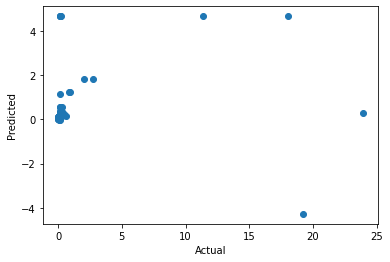

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
119,0.10,0.154785,-0.054785
550,2.04,1.848633,0.191367
626,0.34,0.348633,-0.008633
330,0.15,0.166992,-0.016992
443,0.14,0.568359,-0.428359
...,...,...,...
90,0.01,0.052734,-0.042734
221,0.12,-0.015625,0.135625
89,0.00,0.000977,-0.000977
67,0.06,0.034180,0.025820
